# IMDB Movie dataset analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Through this dataset we want to explore :
<ol>
 <li>The relation between budget and revenue.</li>
 <li>How budget affects popularity.</li>
 <li>How people react to movie runtime.</li>
 <li>Old movies or new ones are more popular?</li>
 <li>which genres are more popular?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Loading data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(4)
#inspect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### values are missing from columns: imdb_id , cast , homepage , director , tagline , keywords , overview  , companies ,  genres
#### but only genres are the important for analysis

### Data Cleaning 

In [3]:
# clean unwanted columns:
clean = df.drop(['original_title','cast','homepage','director','imdb_id'],axis = 1)
clean.drop(['tagline','keywords','overview','budget_adj','production_companies','revenue_adj'],axis = 1 , inplace = True)
clean.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [4]:
# drop rows with missing values
clean.dropna(inplace=True)
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10843 non-null  int64  
 1   popularity    10843 non-null  float64
 2   budget        10843 non-null  int64  
 3   revenue       10843 non-null  int64  
 4   runtime       10843 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10843 non-null  object 
 7   vote_count    10843 non-null  int64  
 8   vote_average  10843 non-null  float64
 9   release_year  10843 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 931.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

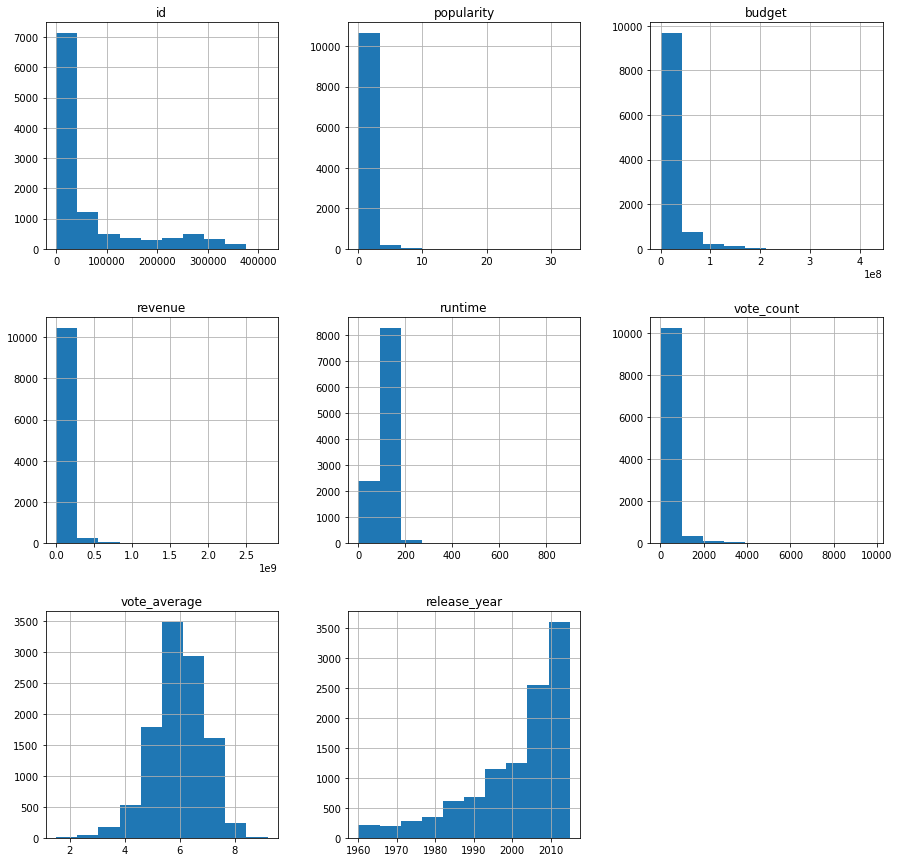

In [5]:
#histograms for all dataset features
clean.hist(figsize=(15,15))

In [6]:
#stats

#means
print("mean revenue is ",clean['revenue'].mean()," mean budget is " ,clean['budget'].mean() , "mean vote average is",clean['vote_average'].mean(),"mean runtime is",clean['runtime'].mean(),"mean release year is",clean['release_year'].mean())


mean revenue is  39907792.38909896  mean budget is  14656724.438716222 mean vote average is 5.973973992437517 mean runtime is 102.1375080697224 mean release year is 2001.3155953149496


### Splitting dataset according to mean values for further investigation

In [7]:
#old and new movies
old = clean[clean['release_year'] < 2001]
new = clean[clean['release_year'] >= 2001]
#high and low budgets
high_budget = clean[clean['budget']>= 14656724.4387]
low_budget = clean[clean['budget']< 14656724.4387]

In [8]:
print('mean popularity in old movies is',old['popularity'].mean(),"while in new ones is",new['popularity'].mean())

mean popularity in old movies is 0.5552983164072467 while in new ones is 0.6996172817735412


### Comparing splitted datasets

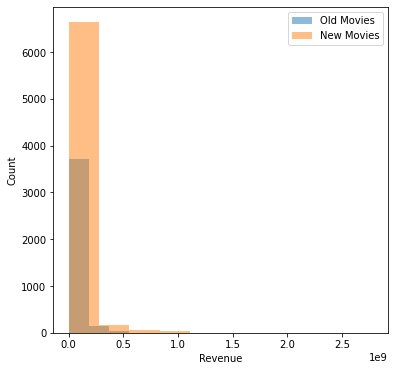

In [9]:
#old and new according to revenue
fig ,ax = plt.subplots(figsize=(6,6))
ax.hist(old['revenue'],alpha = 0.5,label = 'Old Movies')
ax.hist(new['revenue'],alpha = 0.5,label = 'New Movies')
ax.set_xlabel('Revenue')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()
#generally new movies generated more revenue

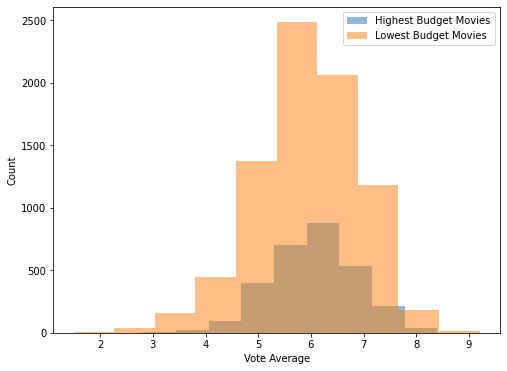

8.4 , 9.2


In [10]:
#highest budgets and lowest budgets according to vote average
fig ,ax = plt.subplots(figsize=(8,6))
ax.hist(high_budget['vote_average'],alpha = 0.5,label = 'Highest Budget Movies')
ax.hist(low_budget['vote_average'],alpha = 0.5,label = 'Lowest Budget Movies')
ax.set_xlabel('Vote Average')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()
#assuring result:
#clean.plot.scatter(x='budget',y='vote_average')
print(high_budget['vote_average'].max() ,",",
low_budget['vote_average'].max())


> **The figure of the highest budget is shifted to right meaning generally high-budget movies had better vote averages than the lower-budget ones**

<AxesSubplot:>

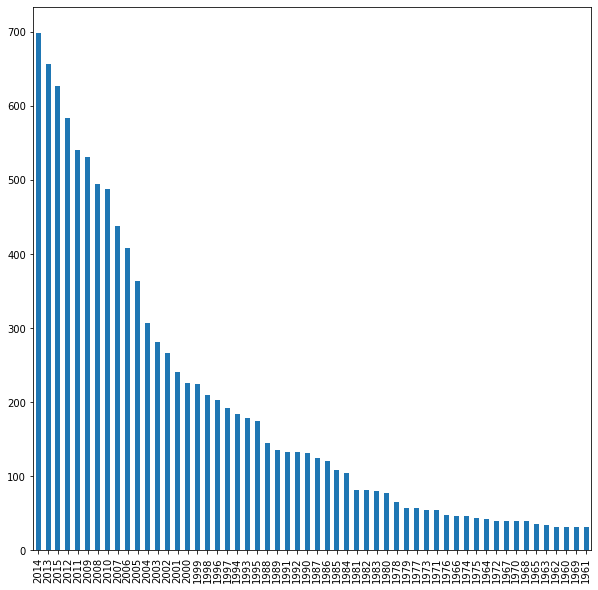

In [11]:
#how many movies were made in each year
clean['release_year'].value_counts().plot(kind='bar',figsize=(10,10))


### The relation between budget and revenue.

<AxesSubplot:xlabel='budget', ylabel='revenue'>

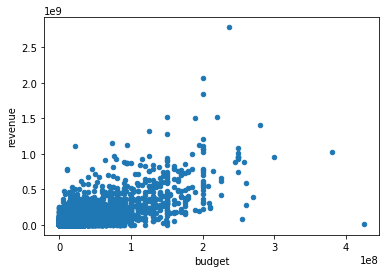

In [12]:
#scatter plot budget against revenue
clean.plot.scatter(x='budget',y='revenue')

#### From the figure above we notice that <br/>
There is some positive correlation between budget and revenue in movies ,<br/>
but there is some outliers while having very high budget , they gave back very little revenue ,<br/>
while the highest revenue is achieved with a budget slightly more than the budget's 50th percentile

### How budget affects popularity.

<AxesSubplot:xlabel='budget', ylabel='popularity'>

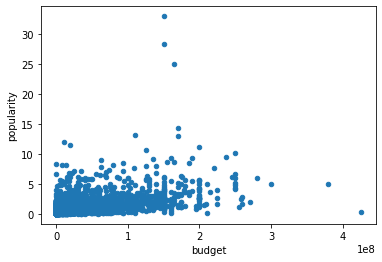

In [13]:
#plotting budget against popularity in the whole dataset
clean.plot.scatter(x='budget',y='popularity')


How budget affects popularity in old movies


<AxesSubplot:xlabel='budget', ylabel='popularity'>

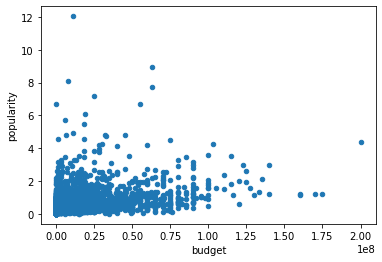

In [14]:
#how budget affects popularity in new and old movies
print('How budget affects popularity in old movies')
old.plot.scatter(x='budget',y='popularity')

How budget affects popularity in new movies


<AxesSubplot:xlabel='budget', ylabel='popularity'>

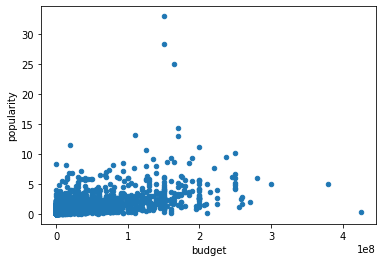

In [15]:
print('How budget affects popularity in new movies')
new.plot.scatter(x='budget',y='popularity')

#### from figures above
The 3 figures looks nearly identitical <br/>
we notice positive correlation between budget and popularity <br/>
but there is some outliers having very high budget while low in popularity <br/>
while the movies with highest popularity are slightly less than the 50th percentile of budget

### How people react to movie runtime.

<AxesSubplot:xlabel='runtime', ylabel='vote_average'>

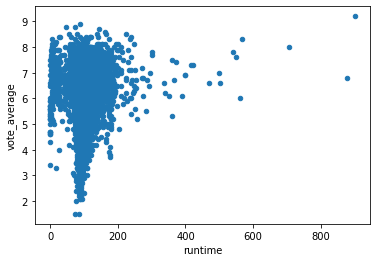

In [16]:
#relation between vote average and runtime
clean.plot.scatter(x='runtime',y='vote_average')

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

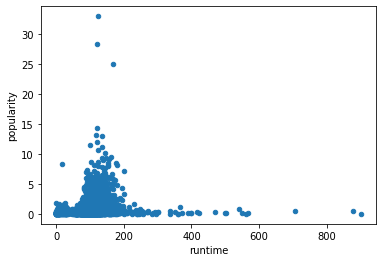

In [17]:
#relation between popularity and runtime
clean.plot.scatter(x='runtime',y='popularity')

#### From the figure above
there is no clear correlation between runtime and vote average <br/>
while the highest popularity movies have runtime around 100 minutes.

### Old movies or new ones are more popular?

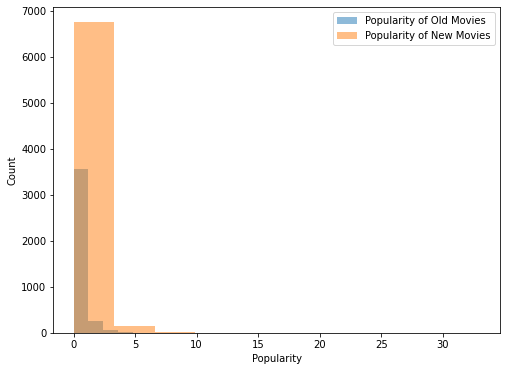

In [18]:
#plotting popularity of the old and new dataset
fig ,ax = plt.subplots(figsize=(8,6))
ax.hist(old['popularity'],alpha = 0.5,label = 'Popularity of Old Movies')
ax.hist(new['popularity'],alpha = 0.5,label = 'Popularity of New Movies')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

#### From the figure above
generally new movies have higher popularity

### Which genres are more popular?

In [19]:
#count how many times each genre is mentioned
action= clean['genres'].str.count('Action').sum()
adventure = clean['genres'].str.count('Adventure').sum()
scifi = clean['genres'].str.count('Science Fiction').sum()
thriller = clean['genres'].str.count('Thriller').sum()
fantasy = clean['genres'].str.count('Fantasy').sum()
crime = clean['genres'].str.count('Crime').sum()
drama = clean['genres'].str.count('Drama').sum()
western = clean['genres'].str.count('Western').sum()
family = clean['genres'].str.count('Family').sum()
animation = clean['genres'].str.count('Animation').sum()
romance = clean['genres'].str.count('Romance').sum()
music = clean['genres'].str.count('Music').sum()
history = clean['genres'].str.count('History').sum()
documentary = clean['genres'].str.count('Documentary').sum()
comedy = clean['genres'].str.count('Comedy').sum()

In [20]:
#create array of genres and another one for their labels
genres = [action,adventure,scifi,thriller,fantasy,crime,drama,western,family,animation,romance,music,history,documentary,comedy]
pie_labels = ['action','adventure','scifi','thriller','fantasy','crime','drama','western','family','animation','romance','music','history','documentary','comedy']

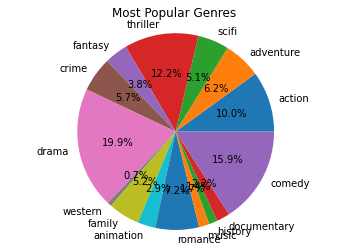

In [21]:
#pie chart of the main genres
plt.pie(genres , labels = pie_labels
        ,autopct='%1.1f%%'
       )
plt.title('Most Popular Genres')
plt.axis('equal')
#plt.legend(
 #   loc='upper left',
  #  labels=pie_labels)
plt.show()

#### From the figure above
The most popular genre among these movies is Drama accounting for 19.9% of all movies <br/>
while the least popular is Western accounting for about 0.7%

<a id='conclusions'></a>
## Conclusions
<ol>
    <li>Mean revenue is  around 40 Million USD</li>
    <li>Mean budget is  14.7 Million USD</li>
    <li>Mean vote average is 5.97</li>
    <li>Mean runtime is 102 Minutes</li>
    <li>High-budget movies had better vote averages than the lower-budget ones</li>
    <li>New movies generated more revenue</li>
    <li>2014 was the highest year in number of movies released while 1961 was the lowest one</li>
    <li>Positive correlation between budget and revenue</li>
    <li>Positive correlation between budget and popularity</li>
    <li>The highest popularity movies have runtime around 100 minutes</li>
    <li>New movies have higher popularity</li>
    <li>The most popular genre among these movies is Drama accounting for 19.9% of all movies
while the least popular is Western accounting for about 0.7%</li>
    
</ol>